<a href="https://colab.research.google.com/github/sivasaigiri/StockPredictionModel/blob/main/StockPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stock Price Prediction**

###**1.Import the Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###**2. Load the Training Dataset.**

In [ ]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


**3. Use the Open Stock Price Column to Train Your Model.**

In [ ]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


**4. Normalizing the Dataset.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

**5. Creating X_train and y_train Data Structures.**

In [ ]:
x_train = []
y_train = []
for d in range(60,1258):
  x_train.append(scaled_training_set[d-60:d,0])
  y_train.append(scaled_training_set[d,0])
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


**6. Reshape the Data.**

In [ ]:
X_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
X_train.shape

(1198, 60, 1)

**7. Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**8. Fitting the Model.**

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size = 32)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0877
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0072
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0055
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0056
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0048
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0053
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0059
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0043
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - loss: 0.0059
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0049
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0037
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0045
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/s

**9. Extracting the Actual Stock Prices**

In [ ]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

**10. Preparing the Input for the Model.**

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**11. Predicting the Values for Stock Prices.**

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


**12. Plotting the Actual and Predicted Prices for Google Stocks.**

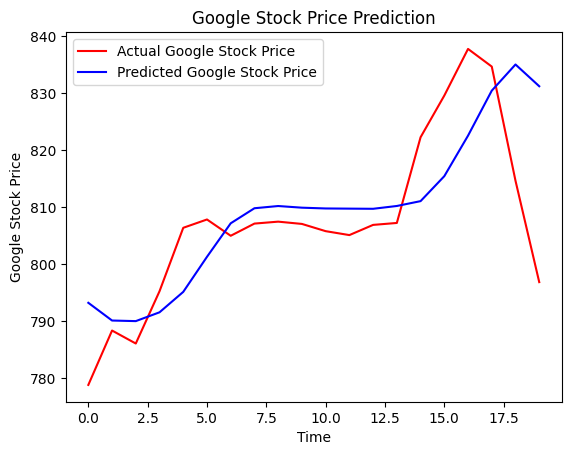

In [ ]:
plt.plot(real_stock_price, color='red', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
